In [2]:
import sys
sys.path.append('/home/jovyan/work')

In [3]:
from src.data_loader import cargar_dataset, tokenize_sentences_by_char, cargar_oraciones_limpias
from collections import Counter
import re
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### **CARGA DE DATOS**

In [5]:
# Cargamos 5 oraciones limpias del dataset WikiText-103
sentences = cargar_oraciones_limpias(split="train", num_oraciones=5)

# Aplicamos tokenización por caracteres
tokenized_sentences_by_char = tokenize_sentences_by_char(sentences)

# Clonamos para aplicar BPE 
bpe_sentences = [sentence[:] for sentence in tokenized_sentences_by_char]

#### **FUNCIONES AUXILIARES PARA BPE**

In [10]:
# Cuenta todos los pares de tokens adyacentes en las oraciones
def obtener_pares(sentences):
    pairs = Counter()
    for sentence in sentences:
        for i in range(len(sentence) - 1):
            pairs[(sentence[i], sentence[i+1])] += 1
    return pairs

# Realiza el merge de un par de tokens en las oraciones
def merge_pairs(sentences, pair_to_merge):
    new_sentences = []
    for sentence in sentences:
        new_sentence = []
        i = 0
        while i < len(sentence):
            if i < len(sentence) - 1 and (sentence[i], sentence[i+1]) == pair_to_merge:
                new_sentence.append(sentence[i] + sentence[i+1])
                i += 2
            else:
                new_sentence.append(sentence[i])
                i += 1
        new_sentences.append(new_sentence)
    return new_sentences

#### **ENTRENAMIENTO BÁSICO DE BPE**

In [11]:
# Número de merges que queremos aplicar
num_merges = 10

# Lista para guardar el tamaño del vocabulario después de cada merge
vocab_sizes = []

for i in range(num_merges):
    # Contamos los pares
    pairs = obtener_pares(bpe_sentences)
    
    if not pairs:
        break  # Si ya no hay pares, terminamos
    
    # Seleccionamos el par más frecuente
    best_pair = pairs.most_common(1)[0][0]
    
    # Realizamos el merge
    bpe_sentences = merge_pairs(bpe_sentences, best_pair)
    
    # Guardamos el tamaño actual del vocabulario
    vocab_actual = set()
    for sentence in bpe_sentences:
        vocab_actual.update(sentence)
    vocab_sizes.append(len(vocab_actual))
    
    print(f"Merge {i+1}: {best_pair}")
    print(f"Tamaño de vocabulario actual: {len(vocab_actual)}\n")

Merge 1: ('a', 'n')
Tamaño de vocabulario actual: 65

Merge 2: ('t', 'i')
Tamaño de vocabulario actual: 66

Merge 3: ('r', 'e')
Tamaño de vocabulario actual: 67

Merge 4: ('o', 'n')
Tamaño de vocabulario actual: 68

Merge 5: (',', ' ')
Tamaño de vocabulario actual: 68

Merge 6: ('l', 'e')
Tamaño de vocabulario actual: 69

Merge 7: (' ', 'the ')
Tamaño de vocabulario actual: 70

Merge 8: ('e', 'r')
Tamaño de vocabulario actual: 71

Merge 9: ('o', 'n ')
Tamaño de vocabulario actual: 72

Merge 10: ('a', 'm')
Tamaño de vocabulario actual: 73



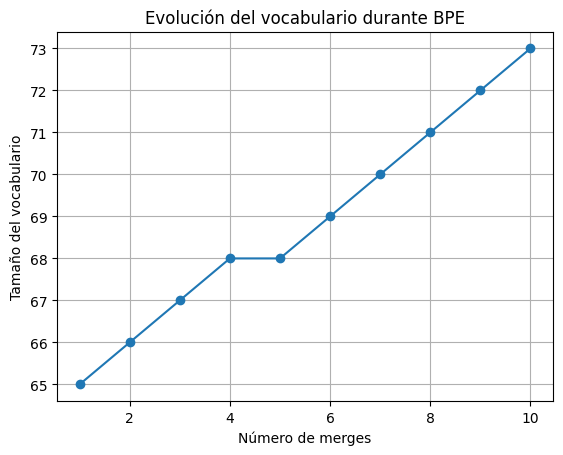

In [12]:
#VISUALIZACIÓN DE LA EVOLUCIÓN DEL VOCABULARIO
plt.plot(range(1, len(vocab_sizes)+1), vocab_sizes, marker='o')
plt.xlabel('Número de merges')
plt.ylabel('Tamaño del vocabulario')
plt.title('Evolución del vocabulario durante BPE')
plt.grid()
plt.show()

In [ ]:
ç